<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `,`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado,sigla,regiao
ACRE,AC,NORTE
ALAGOAS,AL,NORDESTE
AMAPA,AP,NORTE

```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE), 'lxml')
print(fonte)

In [127]:
# visualize os resultados

fonte


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [ ]:
# manipule os dados
def extrair_texto_por_tag(fonte:BeautifulSoup, tag_nome:str) -> list:
    elementos = fonte.find_all(tag_nome)
    return [elemento.get_text() for elemento in elementos]

# Extraindo estados
estados = extrair_texto_por_tag(fonte, 'nome')
print(estados)

# Extraindo siglas
siglas = extrair_texto_por_tag(fonte, 'sigla')
print(siglas)

# Extraindo regiões
regioes = extrair_texto_por_tag(fonte, 'regiao')
print(regioes)


# continue o codigo aqui

['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(file=NOME_ARQUIVO_DESTINO,mode ='w', encoding='utf-8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerow(['estado','sigla','regiao'])
  escritor_csv.writerows(zip(estados,siglas,regioes))

# continue o codigo aqui

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `,`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado,cidade,populacao,pib,pib_percapita
BAHIA,TREMEDAL,18433,57883.9921875,3140.23999023
RIO GRANDE DO SUL,TURUÇU,4000,45723875,11430.96972656
ESPIRITO SANTO,VITÓRIA,320156,19782628,61790.58984375
```


In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)




In [128]:
# visualize os resultados
display(fonte)


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [ ]:
# manipule os dados
df_censo_2010 = fonte.loc[fonte['Censo'] == 2010]
df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita = df_censo_2010[['UF','nome','PIB','Pop_est_2009','PIB_percapita']]
display(df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita)
ufs = df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita['UF'].tolist()
nomes = df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita['nome'].tolist()
PIBs = df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita['PIB'].tolist()
pop_est_2009 = df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita['Pop_est_2009'].tolist()
PIB_percapita = df_censo_2010_uf_nome_PIB_Pop_est_2009_PIB_percapita['PIB_percapita'].tolist()



,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
import csv

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

with open(file=NOME_ARQUIVO_DESTINO,mode='w',encoding='utf-8') as arquivo:
  escritor_csv = csv.writer(arquivo,delimiter=',')
  escritor_csv.writerow(['estado','cidade','populacao','pib','pib_percapita'])
  escritor_csv.writerows(zip(ufs,nomes,pop_est_2009,PIBs,PIB_percapita))


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [56]:
# solução do exercício 1.3
estados_limpo_df = pd.read_csv('estados-limpo.csv')
cidades_limpo_df = pd.read_csv('cidades-limpo.csv')

# Mesclando os DataFrames usando a coluna 'estado' como chave de junção
estados_e_cidades_limpos_df = pd.merge(left=estados_limpo_df, right=cidades_limpo_df, on='estado', how='inner')
estados2 = estados_e_cidades_limpos_df['estado'].tolist()
siglas2 = estados_e_cidades_limpos_df['sigla'].tolist()
regioes2 = estados_e_cidades_limpos_df['regiao'].tolist()
cidade = estados_e_cidades_limpos_df['cidade'].tolist()
populacao = estados_e_cidades_limpos_df['populacao'].tolist()
pib = estados_e_cidades_limpos_df['pib'].tolist()
pib_percapita = estados_e_cidades_limpos_df['pib_percapita'].tolist()

# Exibindo o DataFrame resultante
with open(file='brasil.csv', mode='w', encoding='utf-8') as arquivo:
  escritor_csv = csv.writer(arquivo,delimiter=',')
  escritor_csv.writerow(['estado','sigla','regiao','cidade','populacao','pib','pib_percapita'])
  escritor_csv.writerows(zip(estados2,siglas2,regioes2,cidade,populacao,pib,pib_percapita))

In [ ]:
# verificando se existe um valor NaN no df

estados_e_cidades_limpos_df.isnull().any().any()

False

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [57]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv')
brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
3205,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
3206,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
3207,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
3208,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [76]:
# código para responder a pergunta
cidades_e_populacao = brasil_df[['cidade','populacao']]

dez_cidades_mais_populosas = cidades_e_populacao.nlargest(10, 'populacao')
display(dez_cidades_mais_populosas)


,cidade,populacao
1096,Rio de Janeiro,6186710
230,Salvador,2998056
602,Brasília,2606885
3102,Belo Horizonte,2452617
126,Manaus,1738641
1019,Recife,1561659
1423,Porto Alegre,1436123
1117,São Gonçalo,991382
105,Maceió,936314
1153,Duque de Caxias,872762


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [78]:
# código para responder a pergunta
cidades_e_pib_percapita = brasil_df[['cidade','pib_percapita']]
cinco_menores_pib_percapita = cidades_e_pib_percapita.nsmallest(5, 'pib_percapita')
display(cinco_menores_pib_percapita)


,cidade,pib_percapita
548,Caetanos,2440.570068
555,Novo Triunfo,2497.060059
446,Matina,2551.989990
57,Traipu,2649.479980
397,Mansidão,2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [80]:
# código para responder a pergunta
cidades_e_pib = brasil_df[['cidade','pib']]
quinze_maiores_pibs = cidades_e_pib.nlargest(15, 'pib')
display(quinze_maiores_pibs)

,cidade,pib
1096,Rio de Janeiro,175739344.0
602,Brasília,131487264.0
3102,Belo Horizonte,44595204.0
126,Manaus,40486108.0
1423,Porto Alegre,37787912.0
230,Salvador,32824228.0
1153,Duque de Caxias,25747558.0
2876,Betim,25183730.0
1019,Recife,24835340.0
603,Vitória,19782628.0


 - Qual é o PIB do estado de Santa Catarina?

In [108]:
# código para responder a pergunta
# Criando um DataFrame com a soma do PIB para cada estado
pib_por_estado = brasil_df.groupby('estado')['pib'].agg('sum')

# Acessando o PIB completo do estado de Santa Catarina
pib_santa_catarina = pib_por_estado.loc['SANTA CATARINA']

# # Exibindo o PIB completo de Santa Catarina
print("PIB completo de Santa Catarina no arquivo:", pib_santa_catarina)


PIB completo de Santa Catarina no arquivo: 129806256.75195315


 - Qual é o população da região sul?

In [109]:
# código para responder a pergunta

populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].agg('sum')

populacao_regiao_sul = populacao_por_regiao.loc['SUL']
populacao_regiao_sul

17032871

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [116]:
# código para responder a pergunta
media_pib_percapita_por_estado = brasil_df.groupby('estado')['pib_percapita'].agg('mean')
media_pib_percapita_por_estado
pib_percapita_medio_mato_grosso_do_sul = media_pib_percapita_por_estado.loc['MATO GROSSO DO SUL']
print(f'Pib per capita médio das cidades do Mato Grosso do Sul no arquivo: {pib_percapita_medio_mato_grosso_do_sul}')

Pib per capita médio das cidades do Mato Grosso do Sul no arquivo: 14458.896859975643


 - Qual é a população do Brasil?

In [113]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].agg('sum')
print(f'População do Brasil no arquivo: {populacao_brasil}')

População do Brasil no arquivo: 101885500


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

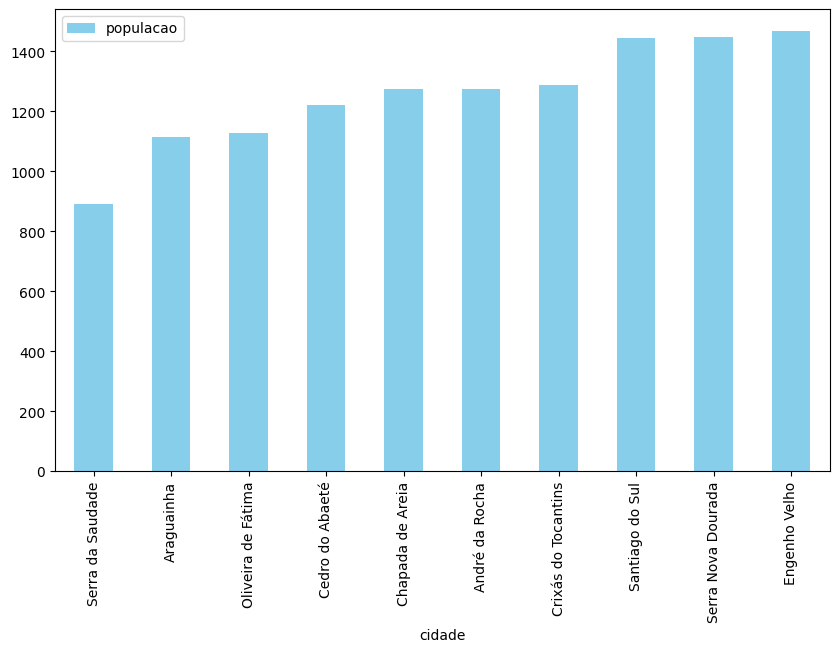

In [123]:
# código para gerar a visualização


dez_cidades_menos_populosas_df = cidades_e_populacao.nsmallest(10, 'populacao')
grafico_dez_cidades_menos_populosas_df=dez_cidades_menos_populosas_df.plot.bar(x='cidade', y='populacao', figsize=(10,6), color='skyblue')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

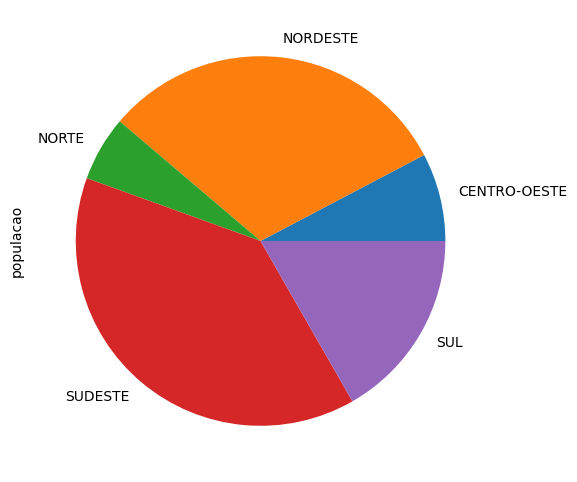

In [126]:
# código para gerar a visualização
populacao_do_brasil_por_regiao = brasil_df.groupby('regiao')['populacao'].agg('sum')
grafico_populacao_do_brasil_por_regiao = populacao_do_brasil_por_regiao.plot.pie(y='populacao',figsize=(10,6))
grafico_populacao_do_brasil_por_regiao